# Lab0 (part 1): Python for Digital Signal and Image Processing

Welcome to your first Digital Signal and Image Processing lab. The goal of this lab is to familiarize with the few Python concepts we need to perform signals and images manipulation. For more accurate Python tutorials you can check the follwing links.
<ul>
<li><a href="http://docs.python-guide.org/en/latest/">Hitchhiker’s Guide to Python</a></li>
<li><a href="http://gestaltrevision.be/wiki/python/python">Python for Vision Research</a></li>
<li><a href="https://www.edx.org/course/introduction-python-data-science-microsoft-dat208x-3">Introduction to Python for Data Science </a> </li>
<li><a href="http://docs.scipy.org/doc/scipy/reference/tutorial/index.html">Scipy tutorial</a></li>
<li><a href="https://docs.python.org/2/tutorial/">The official Python tutorial</a> (NERD alert!)</li>
</ul>

Let's get it started!

Modules are one of the things that make Python (one of) the best languages for data analysis. In the following sections we will see the most useful modules for our purposes.

## <font face="TrueType">Numpy</font>

The very first module we review (perhaps the only one we will use forever) is <a href="http://www.numpy.org/"><font face="TrueType">numpy</font> </a>. This module implements, among the others, the abstraction of <i>vector</i> and <i>matrix</i> that are universally used for <i>signals</i> and <i>images</i>, respectively. Let's try it!

In [1]:
# Press Shift + Enter to run the code in this cell and continue to the next one
import numpy as np # np is THE alias for numpy that everyone uses
signal0 = np.array([0,0,0,0,1,0,0,0,0]) 

In [2]:
print("signal0 data type is: {}".format(type(signal0)))
print("signal0 length is: {}".format(len(signal0)))
print("signal0 shape is: {}".format(signal0.shape))
print("signal0 is: {}".format(signal0))

signal0 data type is: <type 'numpy.ndarray'>
signal0 length is: 9
signal0 shape is: (9L,)
signal0 is: [0 0 0 0 1 0 0 0 0]


The <font face="TrueType">numpy.array</font> object allows to perform some quite sophisticated math opearations in a single line of code. For instance, let's make a 10-elements vector $x$ and let's fill it with increasing numbers.

In [3]:
x = np.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


We can easily compute element-wise multiplication with scalars.

In [4]:
alpha = 2
x_new = alpha*x
print(x_new)

[ 0  2  4  6  8 10 12 14 16 18]


or vectors

In [5]:
print(x * x_new)

[  0   2   8  18  32  50  72  98 128 162]


In [6]:
print(x - x_new)

[ 0 -1 -2 -3 -4 -5 -6 -7 -8 -9]


We can also easily calculate inner products between vectors.

In [7]:
print(np.dot(x,x_new))

570


Matrices are just two dimensional <font face="TrueType">numpy.array</font>, in fact

In [8]:
m1 = np.array([[1,0,0],
               [0,1,0],
               [0,0,1]])

print("m1 data type is: {}".format(type(m1)))
print("m1 shape is: {}".format(m1.shape))

m1 data type is: <type 'numpy.ndarray'>
m1 shape is: (3L, 3L)


and we can use <font face="TrueType">numpy.dot</font> to calculate matrix multiplications (click <a href="https://docs.continuum.io/mkl-optimizations/">here</a> for more information on Anaconda interfaces with high performance linear algebra libraries).

In [9]:
m2 = np.array([[0,1,0],
               [1,1,1],
               [0,1,0]])

print(2*np.dot(m1,m2))

[[0 2 0]
 [2 2 2]
 [0 2 0]]


Keep in mind that you can slice a <font face="TrueType">numpy.array</font> as follows.

<img src="numpy_indexing.png" style="width:500px;height:275px;"></img>

In [10]:
# Print the first two columns
print(m1[:,:2])

[[1 0]
 [0 1]
 [0 0]]


In [11]:
# Print the first two rows
print(m1[:2,:])

[[1 0 0]
 [0 1 0]]


<font face="TrueType">Numpy</font> also implements some common signal, such as the sine or cosine wave.

In [12]:
N = 10              # number of samples
time = np.arange(N) # horizontal axis
x1 = np.sin(time)
print(x1)

[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427
 -0.2794155   0.6569866   0.98935825  0.41211849]


## <font face="TrueType">Matplotlib</font>

Another aspect that makes Python so versatile is that we can easily visualize basically every 1D/2D signal. To do that we need another module: <a href="http://matplotlib.org/"><font face="TrueType">Matplotlib</font></a>.

Let's try to plot our first signal.

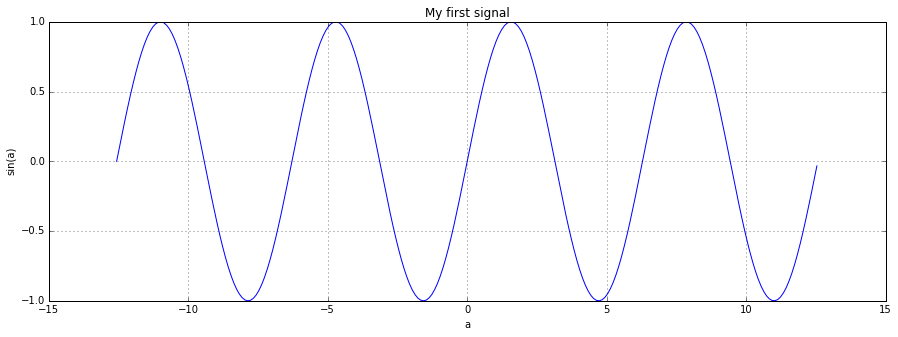

In [13]:
import matplotlib.pyplot as plt

# magic command, it make the image appear immediately below its creation
%matplotlib inline 

# ----- optional commands to simply make a larger figure ---- #
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
# ----------------------------------------------------------- #

a = np.arange(-4*np.pi, 4*np.pi, 0.1)
plt.plot(a, np.sin(a))
plt.grid()
plt.xlabel('a')
plt.title('My first signal')
plt.ylabel('sin(a)')

Sometimes more than one signal in a single plot may be desired. You can easily do it just like that.

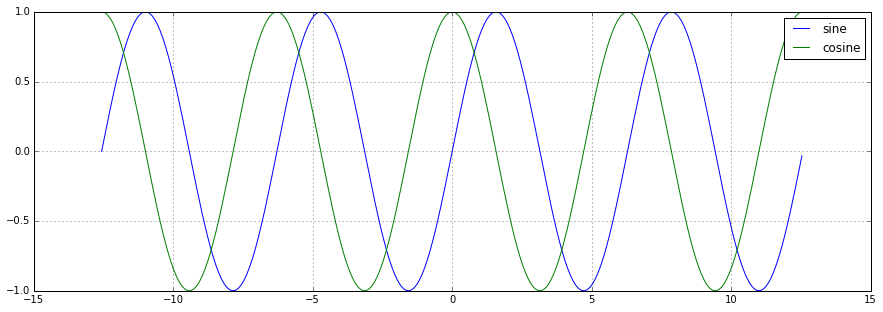

In [14]:
plt.plot(a, np.sin(a), label='sine')
plt.plot(a, np.cos(a), label='cosine')
plt.legend()
plt.grid()

If you want to split the figure in several subfigures, you just need to use the following command.

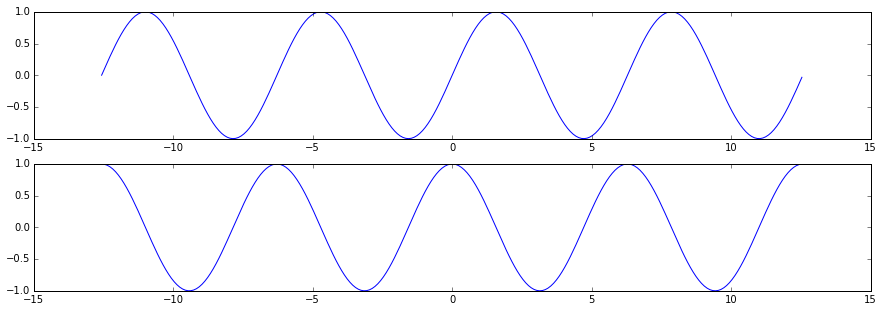

In [16]:
plt.subplot(2,1,1) # 2 rows, 1 column, write in position 1
# --- complete here --- #
plt.plot(a, np.sin(a))

plt.subplot(2,1,2) # 2 rows, 1 column, write in position 2
# --- complete here --- #
plt.plot(a, np.cos(a))

### Few observations on signals and sampling

<ul>
<li>We will meet the $2\pi f_0 t$ term as argument of some sinusoids a bunch of times. Do you know why? If not, let's try to think about it. Both $\text{sin}(t)$ and $\text{cos}(t)$ are periodic functions having period $2\pi$.
![sine_curve](Sine_curve_drawing_animation.gif)
Writing a sinusoid as $\text{sin}(2\pi f_0 t)$, or $\text{cos}(2\pi f_0 t)$, gives you the ability to <i>control</i> the period $\frac{1}{f_0}$ of your signal. This concept is going to be more clear later on.
</li>

<!--- So far we worked with time axis that are so dense that may remind us of continuous signals, but beware, i --->

<li>In order to be processed by a real machine a signal must <b>always</b> be discretized. Mathematically speaking, to discretize a continuous signal, we simply need to multiply it with a <a href="https://en.wikipedia.org/wiki/Dirac_comb">Dirac comb</a>. So, let's represent a continuous signal $x(t)$ and a Dirac comb of period $T_0=1$ 
$$\text{comb}_{T_0}(t)=\sum_{n=-\infty}^{+\infty}\delta(t-nT_0)$$
<img src="sampling_1.png" width=1000 height=400></img>
the obtained discretized signal $x[n]$ will look like the following.
<img src="sampling_2.png" width=1000 height=400></img>
So, <b>sampling matters!</b> Our discretized signal $x[n]$ does not look <i>at all</i>  like the original continuous signal $x(t)$. Basically the sampling frequency we used was way too coarse to catch the actual structure of $x(t)$. We may notice that in <b>real cases</b> we don't actually know the continuous signal, but we can only observe the discretized one. Further details on this topic will be given in next labs.
</li>
</ul>

## Basic signal manipulation

So far so good, right? We saw how to create and plot some basic signal. Now let's try to do something more interesting. 

Continuous signals are pure mathematical abstractions and, of course, we cannot deal with them. Every time we aim at representing some signal, we need to collect <b>samples</b>. The very first thing we need to do <b>every time</b> we want to generate a synthetic signal is to define the horizontal (time) axis. There are several equivalent ways to do that, let's take into account to most basic one. We can start defining the <b>number of samples</b> $N$ and the <b>sampling rate</b> $f_s$ (aka sampling frequency or $\frac{\# \text{samples}}{\text{experiment time}}$) expressed in Hz.

p.s.: keep in mind that $1~\text{Hz} = \frac{1}{\text{sec}}$

In [17]:
N = 1024  # Samples (why 1024? why not?!)
fs = 2048 # Hz

In this case, which would be the duration our experiment? It is $N\cdot\frac{1}{f_s}$ in fact $\#\text{samples}\cdot\frac{\text{experiment time}}{\# \text{samples}} = \text{experiment time}$

In [20]:
from __future__ import division # handy command if you are using python 2.7
t1 = np.arange(N) * 1/fs
print(t1)

[  0.00000000e+00   4.88281250e-04   9.76562500e-04 ...,   4.98535156e-01
   4.99023438e-01   4.99511719e-01]


or, **almost** equivalently

In [21]:
t2 = np.linspace(0, N/fs, N)
print(t2)

[  0.00000000e+00   4.88758553e-04   9.77517107e-04 ...,   4.99022483e-01
   4.99511241e-01   5.00000000e-01]


So, let's try to plot some signals.

### $x(t)=\text{sin}(2\pi f_0 t)~~where~~f_0 = 10~\text{Hz}$

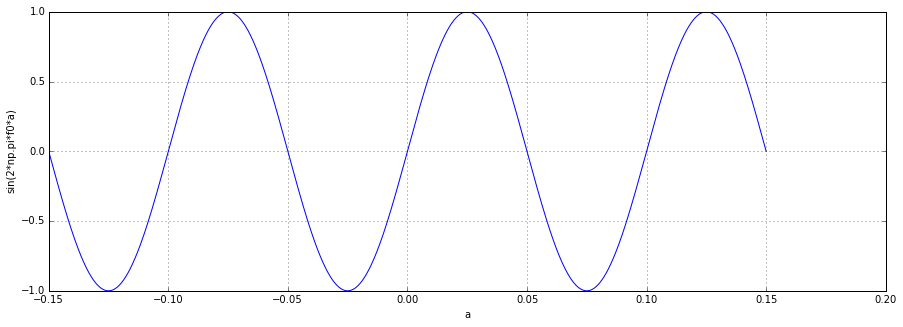

In [52]:
# --- complete here --- #
a = np.linspace(-0.15, 0.15, 1000)
f0 = 10
plt.plot(a, np.sin(2*np.pi*f0*a))
plt.grid()
plt.xlabel('a')
plt.ylabel('sin(2*np.pi*f0*a)')

Does it look like you expected? Try to play a bit with different values for $N$ and $f_0$, what do you observe?

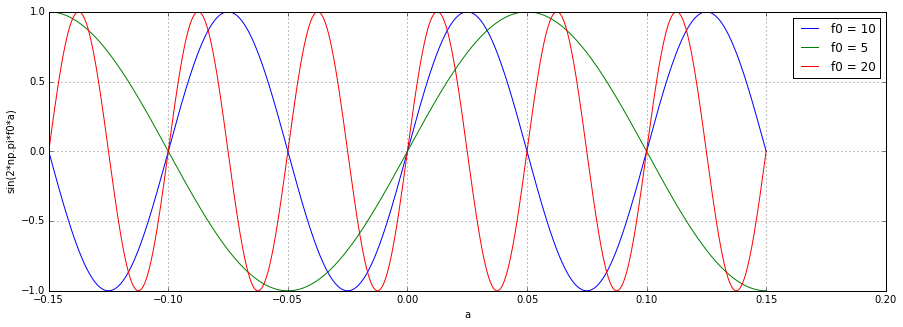

In [53]:
f0 = 10
plt.plot(a, np.sin(2*np.pi*f0*a), label="f0 = 10")
f0 = 5
plt.plot(a, np.sin(2*np.pi*f0*a), label="f0 = 5")
f0 = 20
plt.plot(a, np.sin(2*np.pi*f0*a), label="f0 = 20")
plt.grid()
plt.xlabel('a')
plt.ylabel('sin(2*np.pi*f0*a)')
plt.legend()

### $x(t)=2~\text{sin}(2\pi f_1 t)+0.5~\text{sin}(2\pi f_2 t)~~where~~f_1 = 10~\text{Hz}~~~and~~~f_2=50~\text{Hz}$

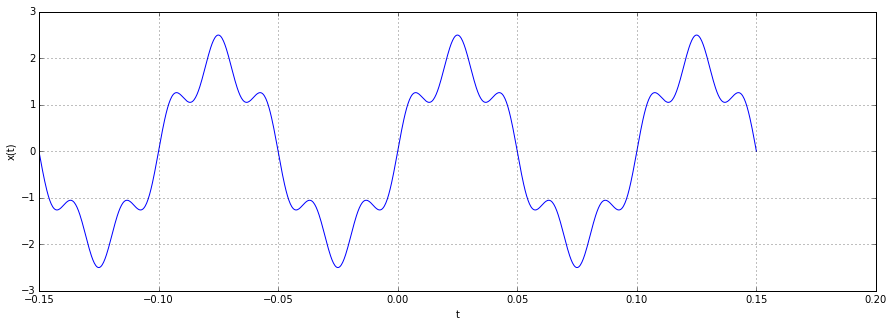

In [57]:
# --- complete here --- #
f1 = 10
f2 = 50
plt.plot(a, 2*np.sin(2*np.pi*f1*a)+0.5*np.sin(2*np.pi*f2*a))
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')

Try to play a bit with $f_1$ and $f_2$. What do you observe?

You can be as wild as you wish, try something like...

(-1.5, 3.5)

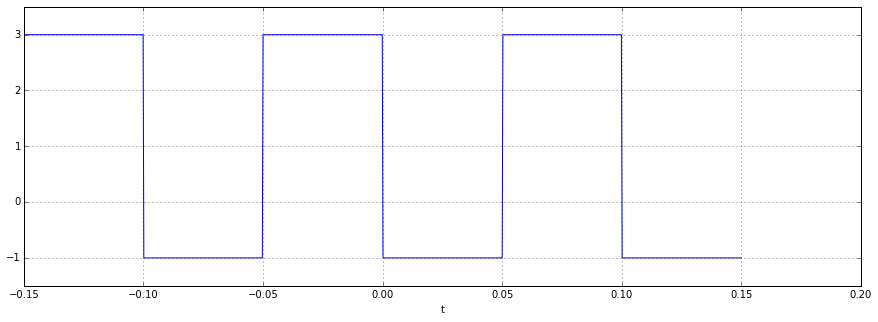

In [56]:
t=a
f1 = 10
x = 1-2*np.sign(np.sin(2*np.pi*f1*t))

plt.plot(t,x)
plt.grid()
plt.xlabel('t')
plt.ylim([-1.5,3.5])

<font face="TrueType">Numpy</font> implements some helpful pseudo-random generators. Let's check the documentation.

In [40]:
np.random.randn??

In [31]:
print(np.random.randn(1))

[-0.78358269]


Now try to represent (in the same plane) 5 sinusoidal signals where amplitude $A$, frequency $f_0$ and phase $\phi$ are extracted from random distributions.

$A \sim \mathcal{N}(1, 2)$

$f_0 \sim \mathcal{N}(10, 5)$

$\phi \sim \mathcal{N}(0, 0.1)$

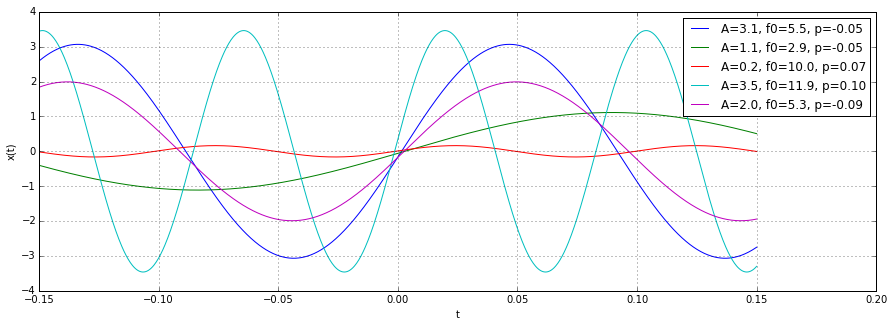

In [58]:
# --- complete here --- #
for x in range(0, 5):
    A = np.random.normal(1, 2)
    f0 = np.random.normal(10, 5)
    p = np.random.normal(0, 0.1)
    x = A*np.sin(2*np.pi*f0*t+p)

    plt.plot(t,x, label="A=%.1f, f0=%.1f, p=%.2f" % (A, f0, p))
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend()

### Exercises
Use the concept you just learned to plot signals that approximately look like the following.

<ol>
<li><img src="x5.png" width=1000 height=400></img></li>
<li><img src="x3.png" width=1000 height=400></img></li>
<li><img src="x1.png" width=1000 height=400></img></li>
<li><img src="x2.png" width=1000 height=400></img></li>
<li><img src="x4.png" width=1000 height=400></img></li>
</ol>

### Optional
Can you represent a set of signals that approximately look like the logo of this course?

<ol>
<li><img src="x6.png" width=1000 height=400></img></li>
</ol>

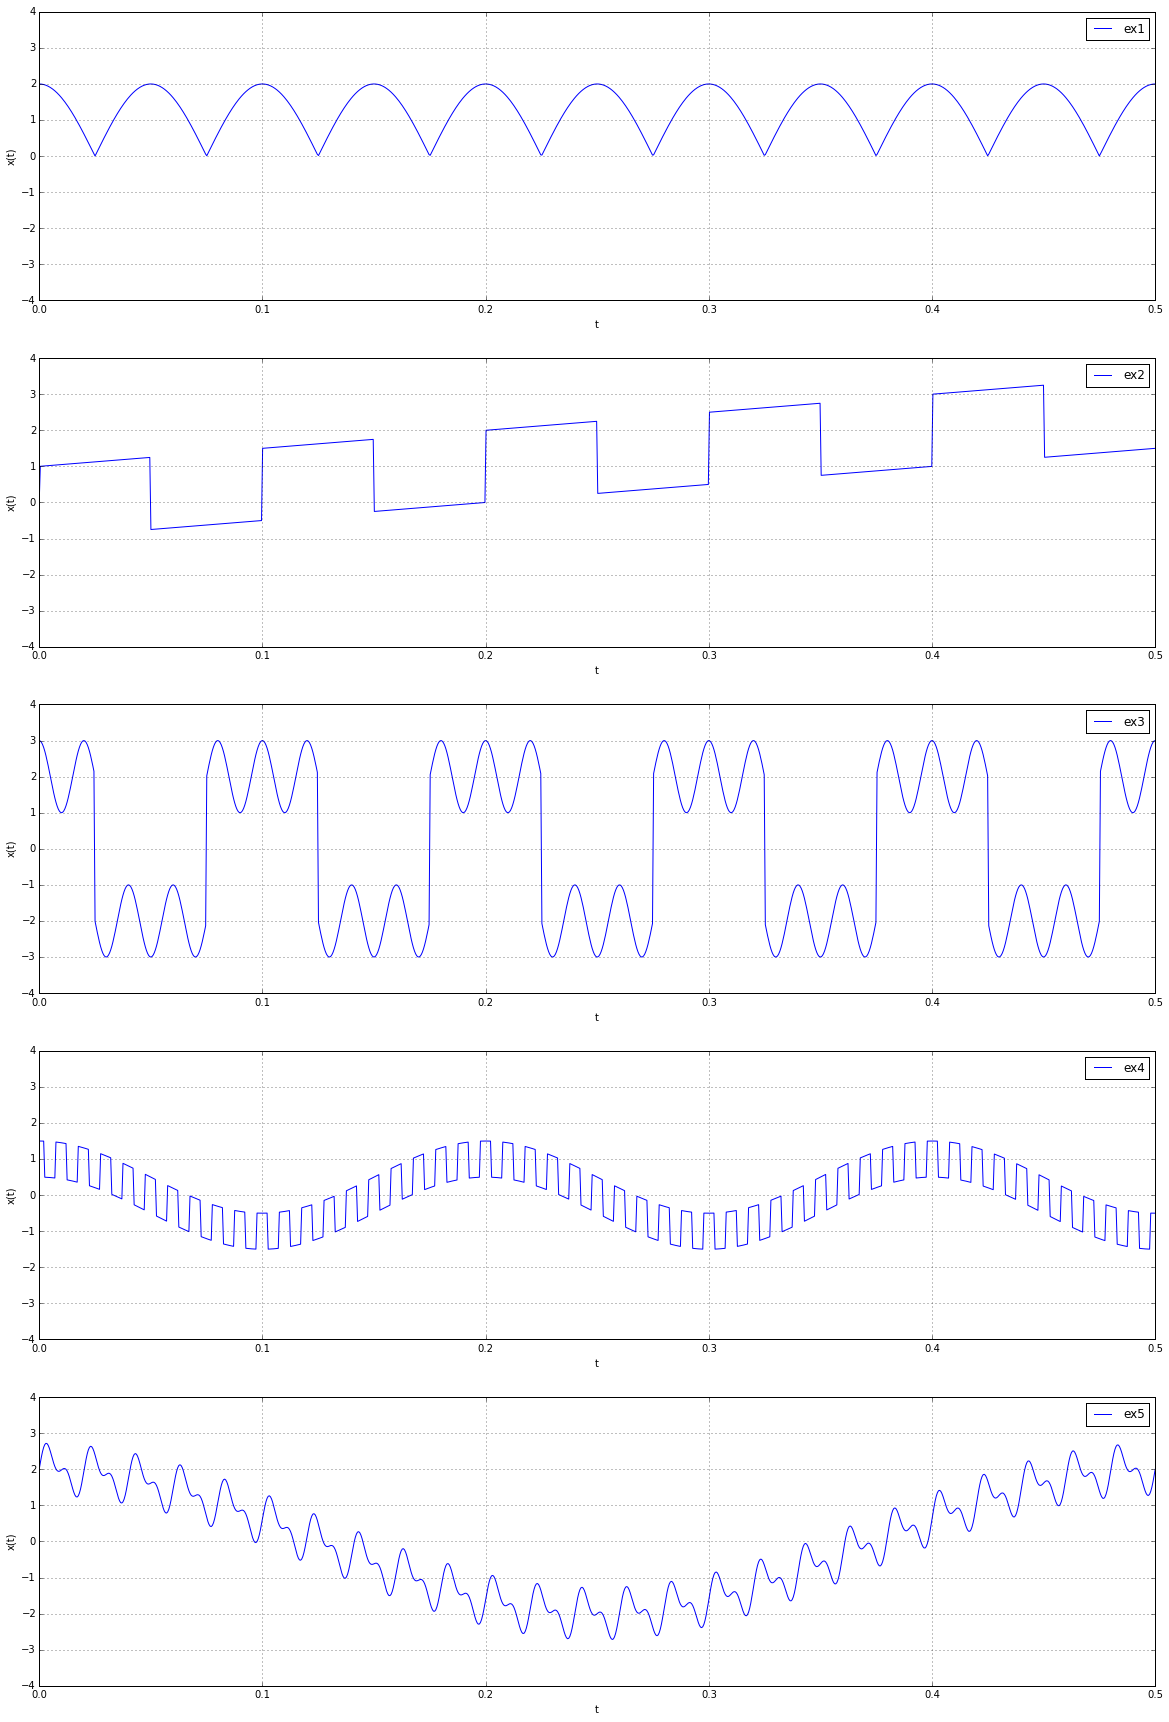

In [72]:
plt.figure(figsize=(20,30))
t = np.linspace(0, 0.5, 1000)
ex_tot = 5

def ex(ex_num, x): 
    plt.subplot(ex_tot,1,ex_num)
    plt.plot(t,x, label="ex%d" % ex_num)
    plt.grid()
    plt.xlabel('t')
    plt.ylabel('x(t)')
    plt.legend() 
    plt.ylim([0,0.5])
    plt.ylim([-4,4])

#Ex1
A=2
p=np.pi/2
f = 10
x1 = np.absolute(A*np.sin(2*np.pi*f*t+p))
ex(1, x1)

#Ex2
A=1
p=0
f = 10
x2 = 5*t + np.sign(A*np.sin(2*np.pi*f*t+p))
ex(2, x2)

#Ex3
A0 = 2
p0 = np.pi/2
f0 = 10
A1 = 1
f1 = 5*f0
p1 = np.pi/2
x3 = A0*np.sign(np.sin(2*np.pi*f0*t+p0)) + A1*np.sin(2*np.pi*f1*t+p1)
ex(3, x3)

#Ex4
A0 = 1
p0 = np.pi/2
f0 = 5
A1 = 1/2
f1 = 20*f0
p1 = np.pi/2
x4 = A0*np.sin(2*np.pi*f0*t+p0) + A1*np.sign(np.sin(2*np.pi*f1*t+p1))
ex(4, x4)

#Ex5
A0 = 2
p0 = np.pi/2
f0 = 2
A1 = 1/2
f1 = 25*f0
p1 = 0
A2 = A1/3*2
f2 = f1*2
p2 = 0
x5 = A0*np.sin(2*np.pi*f0*t+p0) + A1*np.sin(2*np.pi*f1*t+p1) + A2*np.sin(2*np.pi*f2*t+p2)
ex(5, x5)


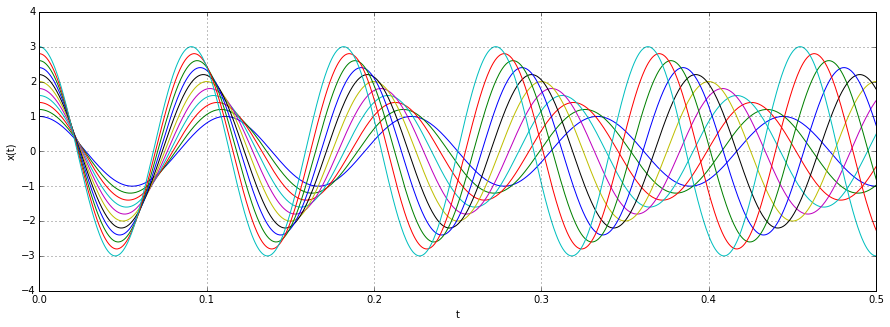

In [76]:
#Optional

plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend() 
plt.ylim([0,0.5])
plt.ylim([-4,4])

lines = 10
for i in range(0, lines+1):
    A = 1 + i*2/lines
    p = np.pi/2
    f = 9 + i*2/lines
    x = A*np.sin(2*np.pi*f*t+p)
    plt.plot(t, x)
